# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import CSV
output_data_file = "output_data/cities.csv"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city

    # print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # print(city_weather)

        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']

        # print(city_lat)
        
        city_lng = city_weather['coord']['lon']

        # print(city_lng)
        
        city_max_temp = city_weather['main']['temp_max']

        # print(city_max_temp)
        
        city_humidity = city_weather['main']['humidity']

        # print(city_humidity)
        
        city_clouds = city_weather['clouds']['all']

        # print(city_clouds)
        
        city_wind = city_weather['wind']['speed']

        # print(city_wind)
        
        city_country = city_weather['sys']['country']

        # print(city_country)
        
        city_date = city_weather['dt']

        # print(city_date)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | inekar
City not found. Skipping...
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | bikenibeu village
Processing Record 8 of Set 1 | kone
Processing Record 9 of Set 1 | remire-montjoly
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 13 of Set 1 | pumwani
City not found. Skipping...
Processing Record 14 of Set 1 | puerto deseado
Processing Record 15 of Set 1 | mana
Processing Record 16 of Set 1 | corner brook
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,76.01,65,0,24.00,US,1714253886
1,port-aux-francais,-49.3500,70.2167,41.70,73,100,19.64,TF,1714254126
2,lihue,21.9789,-159.3672,78.39,80,75,10.36,US,1714253926
3,papatowai,-46.5619,169.4708,54.43,76,10,3.47,NZ,1714253905
4,waitangi,-43.9535,-176.5597,56.82,80,18,4.00,NZ,1714254127


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,76.01,65,0,24.00,US,1714253886
1,port-aux-francais,-49.3500,70.2167,41.70,73,100,19.64,TF,1714254126
2,lihue,21.9789,-159.3672,78.39,80,75,10.36,US,1714253926
3,papatowai,-46.5619,169.4708,54.43,76,10,3.47,NZ,1714253905
4,waitangi,-43.9535,-176.5597,56.82,80,18,4.00,NZ,1714254127


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

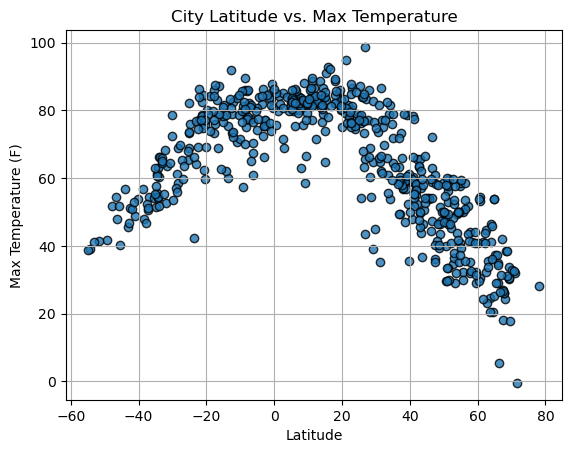

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lat,
            max_temp,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

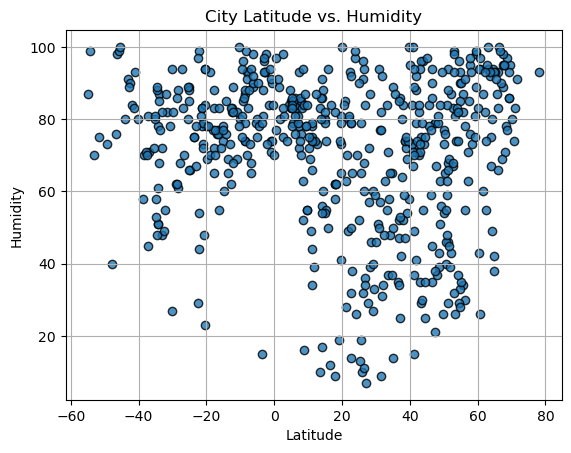

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat,
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

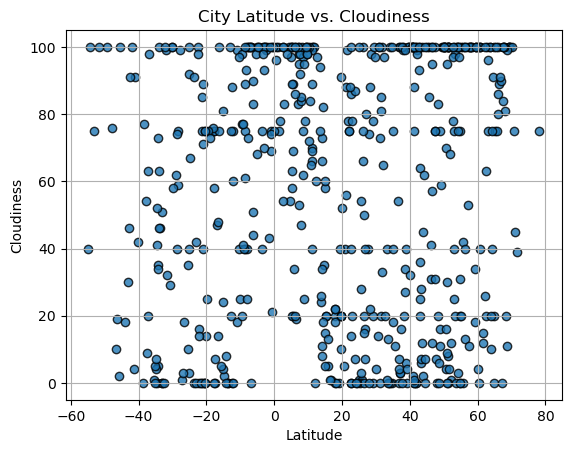

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

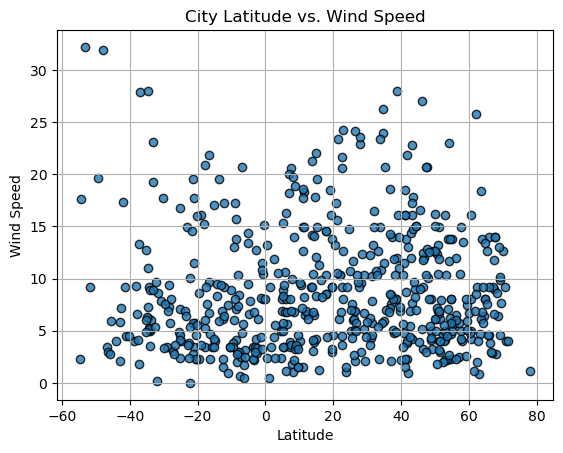

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots

def regression_plot(x, y, line_x, line_y):
    plt.scatter(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(line_x, line_y),fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,76.01,65,0,24.00,US,1714253886
2,lihue,21.9789,-159.3672,78.39,80,75,10.36,US,1714253926
5,bikenibeu village,1.3673,173.1241,84.16,89,75,9.22,KI,1714253901
7,remire-montjoly,4.9167,-52.2667,82.44,83,100,6.91,GF,1714254128
8,albany,42.6001,-73.9662,63.25,70,100,5.48,US,1714254088


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,41.70,73,100,19.64,TF,1714254126
3,papatowai,-46.5619,169.4708,54.43,76,10,3.47,NZ,1714253905
4,waitangi,-43.9535,-176.5597,56.82,80,18,4.00,NZ,1714254127
6,kone,-21.0595,164.8658,76.75,73,71,3.44,NC,1714254128
9,grytviken,-54.2811,-36.5092,39.07,99,100,17.67,GS,1714254129


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8758281886931992


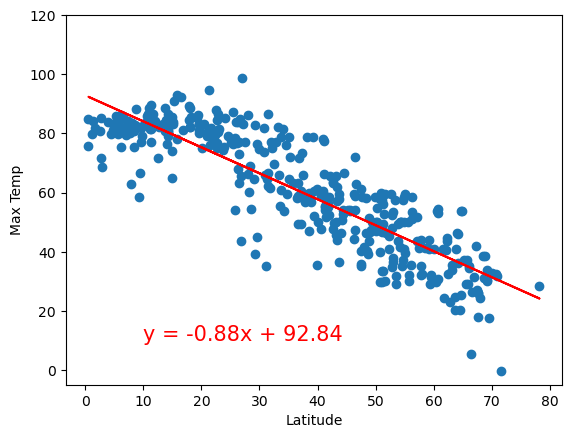

In [77]:
# Linear regression on Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.ylim(-5, 120)
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 10, 10)

The r-value is: 0.8050918429304983


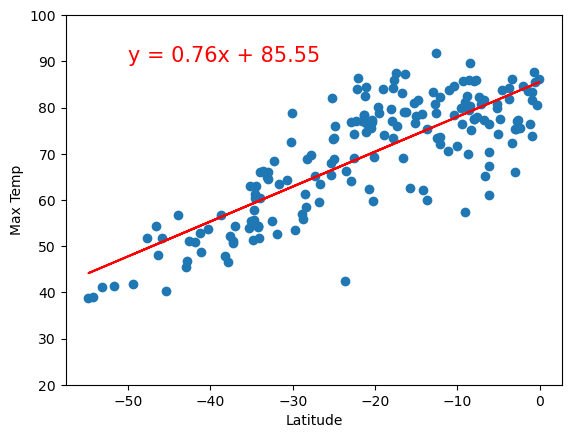

In [74]:
# Linear regression on Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.ylim(20, 100)
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -50, 90)

**Discussion about the linear relationship:** The graphs have opposite linear relationships. Northern hemisphere has a negative relationship; however, southern hemisphere has a positive relationship. It appears as the latitude rises in the northern hemipshere, the max temperature declines. As the latitude rises in the southern hemisphere, the max temperature rises as well.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08054773767021044


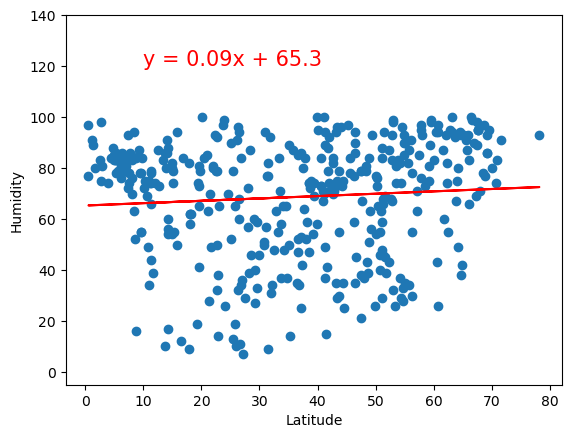

In [83]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(-5, 140)
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 10, 120)

The r-value is: 0.1560435263623013


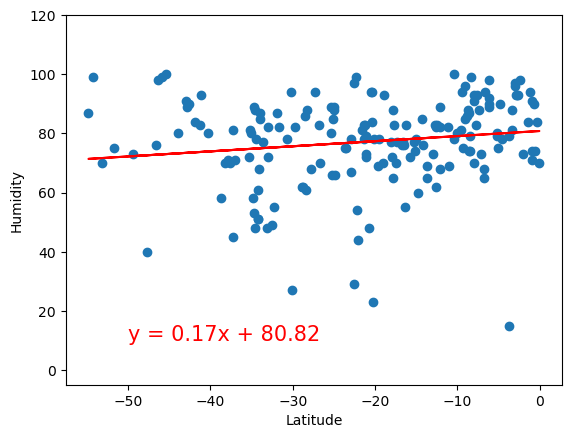

In [81]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(-5,120)
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], -50, 10)

**Discussion about the linear relationship:** The graphs have similar linear relationships as both northern and southern hemispheres have no apparent linear correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02054023799337072


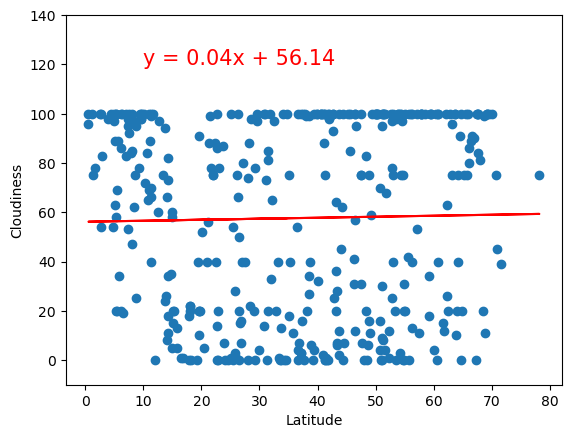

In [79]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(-10, 140)
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 10, 120)

The r-value is: 0.22966599461983414


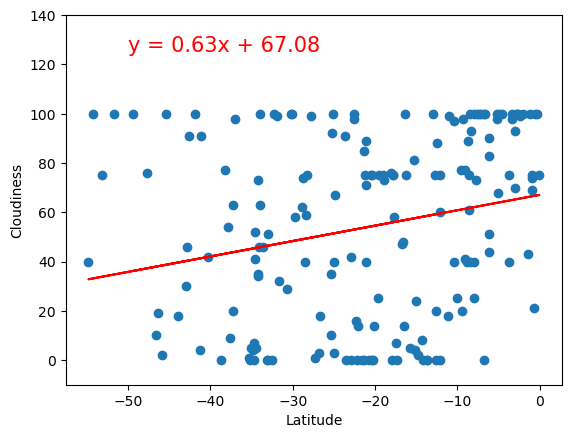

In [86]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(-10, 140)
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], -50, 125)

**Discussion about the linear relationship:** The graphs have similar linear relationships as both northern and southern hemispheres have no apparent linear correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0576373343828381


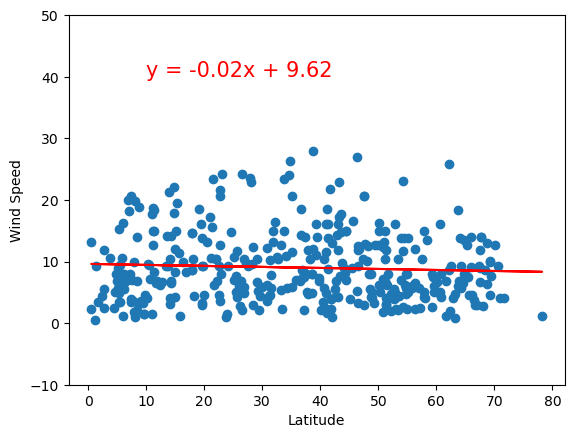

In [68]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(-10, 50)
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 10, 40)

The r-value is: -0.17172505203032745


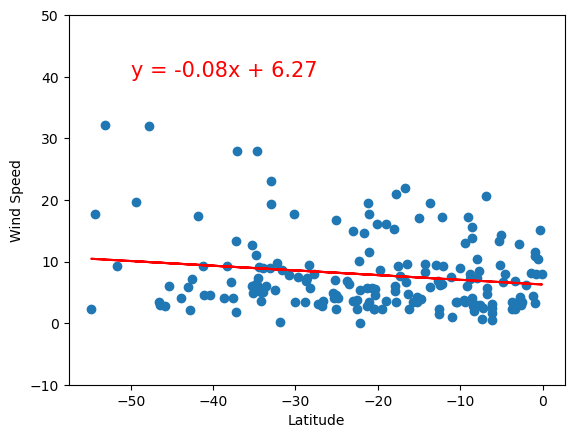

In [70]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(-10, 50)
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], -50, 40)

**Discussion about the linear relationship:** The graphs have similar linear relationships as both northern and southern hemispheres have no apparent linear correlation between wind speed and latitude.